# Week 9 Cloud-Hosted Notebook Data Manipulation


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nogibjj/yijia_ids706_miniProj9/blob/main/main.ipynb)

## Part 1: Setup - Import Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Part 2: Load Dataset from URL

In [2]:
# Dataset URL
file_url = "https://raw.githubusercontent.com/nogibjj/yijia_ids706_miniProj3/refs/heads/main/rdu-weather-history.csv"

# Function to load the dataset from a URL
def load_dataset(filepath):
    data = pd.read_csv(filepath)
    return data

# Test loading data
data = load_dataset(file_url)
assert isinstance(data, pd.DataFrame), "Loaded data should be a DataFrame"
print("Data loaded successfully.")
data.head()


Data loaded successfully.


,Date,Temperature Minimum,Temperature Maximum,Precipitation,Snowfall,Snow Depth,Avgerage Wind Speed
0,2022-01-08,21,42,0.0,0.0,0.0,3.8
1,2022-01-17,33,42,0.0,0.0,0.0,13.0
2,2022-01-26,28,42,0.0,0.0,0.0,8.5
3,2022-02-05,27,47,0.0,0.0,0.0,6.5
4,2022-02-08,33,50,0.0,0.0,0.0,2.9


## Part 3: Calculate Statistics for Selected Columns

In [3]:
# Function to calculate statistics
# Calculate mean, median, and standard deviation for selected columns.
def calculate_statistics(data):
    selected_columns = [
        'Temperature Minimum', 'Temperature Maximum', 'Precipitation',
        'Snowfall', 'Snow Depth', 'Avgerage Wind Speed'
    ]
    data = data[selected_columns]
    stats = {
        "mean": data.mean(),
        "median": data.median(),
        "std_dev": data.std(),
    }
    return pd.DataFrame(stats).T

# Test calculate_statistics
stats = calculate_statistics(data)
assert isinstance(stats, pd.DataFrame), "Statistics should be a DataFrame"
assert 'mean' in stats.index, "Statistics should include 'mean'"
assert 'Temperature Minimum' in stats.columns, "Statistics should include 'Temperature Minimum'"
print("Statistics calculated successfully.")
stats

Statistics calculated successfully.


,Temperature Minimum,Temperature Maximum,Precipitation,Snowfall,Snow Depth,Avgerage Wind Speed
mean,44.225166,66.966887,0.127020,0.017748,0.033113,7.010204
median,45.000000,70.000000,0.000000,0.000000,0.000000,6.700000
std_dev,14.538763,14.719337,0.327184,0.140917,0.242685,3.171226


## Part 4: Generate and Save Histogram for a Column

Histogram created successfully.


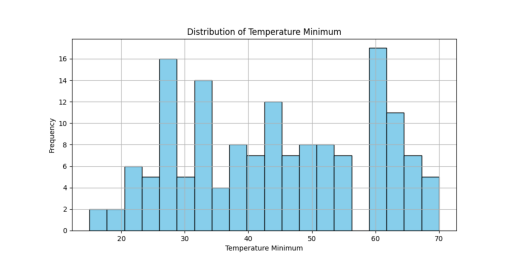

In [4]:
# Function to generate a histogram for the specified column and save it.
def create_histogram(data, column, filepath):
    plt.figure(figsize=(10, 5))
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.savefig(filepath)
    plt.close()

# Test create_histogram
test_column = "Temperature Minimum"
histogram_path = f"{test_column.lower().replace(' ', '_')}_distribution.png"
create_histogram(data, test_column, histogram_path)

# Check if file was created
assert os.path.exists(histogram_path), f"{histogram_path} was not created!"
print("Histogram created successfully.")
plt.imshow(plt.imread(histogram_path))
plt.axis('off')
plt.show()

## Part 5: Generate Visualizations for Multiple Columns

Displaying temperature_maximum_distribution.png:


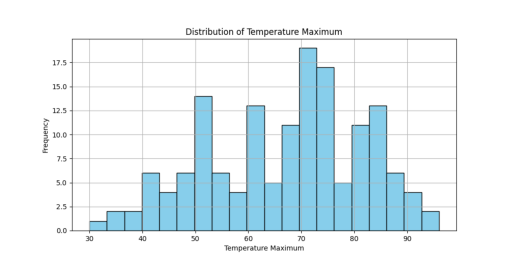

Displaying temperature_minimum_distribution.png:


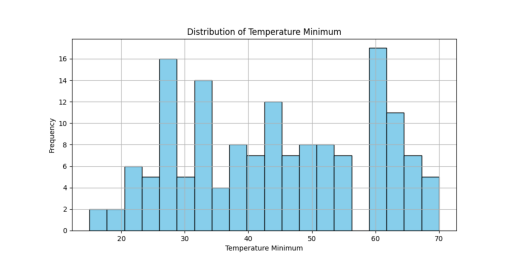

Displaying precipitation_distribution.png:


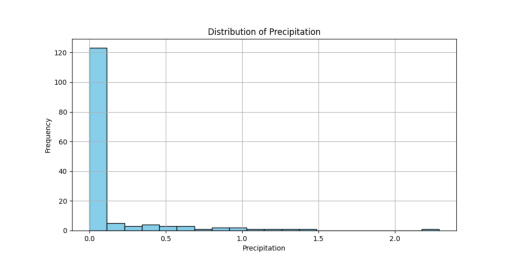

In [5]:
# Function to generate visualizations for specific columns and save them as PNG files
def generate_visualizations(filepath):
    data = load_dataset(filepath)
    columns = ["Temperature Maximum", "Temperature Minimum", "Precipitation"]
    image_paths = []
    for column in columns:
        image_path = f"{column.lower().replace(' ', '_')}_distribution.png"
        create_histogram(data, column, image_path)
        image_paths.append(image_path)
    return image_paths

# Test generate_visualizations and display images
image_paths = generate_visualizations(file_url)
for path in image_paths:
    assert os.path.exists(path), f"{path} was not created!"
    print(f"Displaying {path}:")
    img = plt.imread(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

